# Case Study

## Part 1

### Git & version control

1. Create a Github repository called "ames-housing-analysis".
1. Copy the ames.csv data from the `data/` directory into this repository.
1. Update the README with a short synopsis of this repo.
1. Create a folder called `notebooks/`
1. Add, commit, and push what you have so far. Verify in that it appears in GitHub on your repository page.

### Exploratory data analysis

1. In the repo's `notebooks/` folder, create a new notebook: `eda.ipynb`.
2. Load the ames.csv data.
3. Assess the distribution of the response variable (`Sale_Price`).
4. How many features are numeric vs. categorical? (Make sure to create two variables: `num_features` and `cat_features`, to use later)
5. Pick a numeric feature that you believe would be influential on a home's `Sale_Price`. Assess the distribution of the numeric feature. Assess the relationship between that feature and the `Sale_Price`.
6. Pick a categorical feature that you believe would be influential on a home's `Sale_Price`. Assess the distribution of the categorical feature. Assess the relationship between that feature and the `Sale_Price`.

In [1]:
import pandas as pd

ames = pd.read_csv('../data/ames.csv')
ames.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [2]:
ames.shape

(2930, 81)

In [3]:
target = ames['Sale_Price']
target.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: Sale_Price, dtype: float64

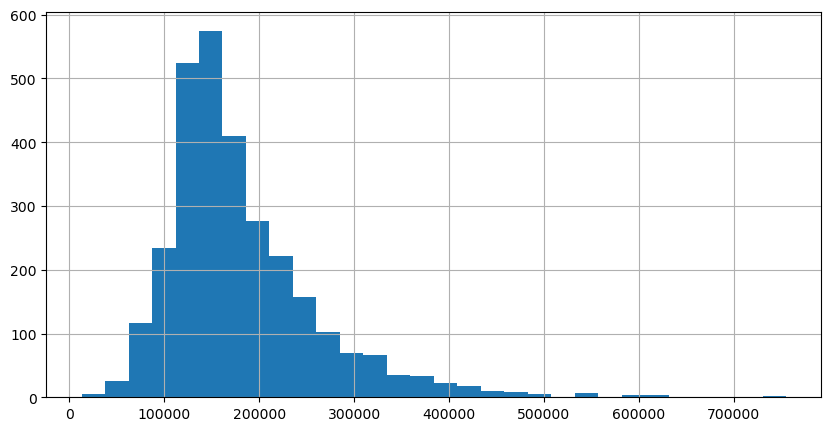

In [5]:
target.hist(figsize=(10, 5), bins=30);

In [6]:
features = ames.drop(columns='Sale_Price')
features.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,NaN,0,5,2010,WD,Normal,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,NaN,0,6,2010,WD,Normal,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,NaN,0,4,2010,WD,Normal,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,NaN,0,3,2010,WD,Normal,-93.638933,42.060899


In [10]:
import numpy as np

num_features = features.select_dtypes(np.number)
cat_features = features.select_dtypes(object)

In [11]:
num_features.head()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Longitude,Latitude
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,62,0,0,0,0,0,5,2010,-93.619754,42.054035
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,120,0,0,6,2010,-93.619756,42.053014
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,36,0,0,0,0,12500,6,2010,-93.619387,42.052659
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,0,0,4,2010,-93.617320,42.051245
4,74,13830,1997,1998,0,3,0,137,928,928,...,34,0,0,0,0,0,3,2010,-93.638933,42.060899


In [12]:
cat_features.head()

,MS_SubClass,MS_Zoning,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,...,Garage_Type,Garage_Finish,Garage_Qual,Garage_Cond,Paved_Drive,Pool_QC,Fence,Misc_Feature,Sale_Type,Sale_Condition
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,...,Attchd,Fin,Typical,Typical,Partial_Pavement,No_Pool,No_Fence,NaN,WD,Normal
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,...,Attchd,Unf,Typical,Typical,Paved,No_Pool,Minimum_Privacy,NaN,WD,Normal
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,...,Attchd,Unf,Typical,Typical,Paved,No_Pool,No_Fence,Gar2,WD,Normal
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,...,Attchd,Fin,Typical,Typical,Paved,No_Pool,No_Fence,NaN,WD,Normal
4,Two_Story_1946_and_Newer,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,Typical,Typical,Paved,No_Pool,Minimum_Privacy,NaN,WD,Normal


In [13]:
num_features.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd',
       'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch',
       'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Year_Sold', 'Longitude',
       'Latitude'],
      dtype='object')

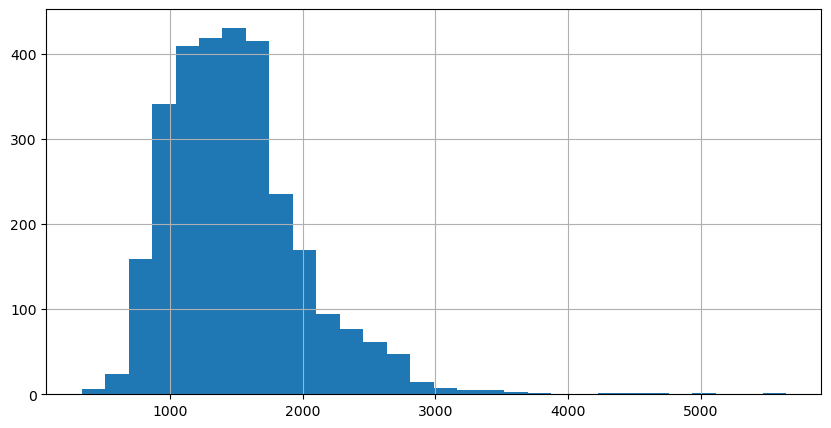

In [14]:
num_features['Gr_Liv_Area'].hist(figsize=(10, 5), bins=30);

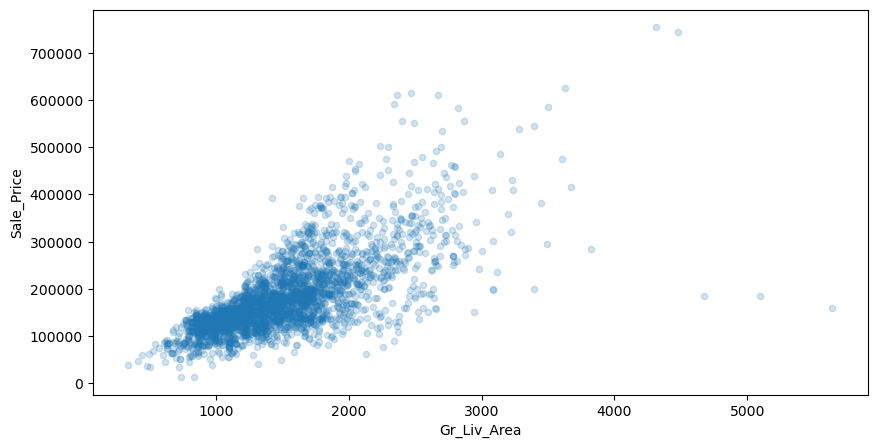

In [15]:
ames.plot.scatter(x='Gr_Liv_Area', y='Sale_Price', figsize=(10, 5), alpha=0.2);

In [16]:
cat_features.columns

Index(['MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 'Lot_Shape',
       'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood',
       'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style',
       'Overall_Qual', 'Overall_Cond', 'Roof_Style', 'Roof_Matl',
       'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Heating_QC',
       'Central_Air', 'Electrical', 'Kitchen_Qual', 'Functional',
       'Fireplace_Qu', 'Garage_Type', 'Garage_Finish', 'Garage_Qual',
       'Garage_Cond', 'Paved_Drive', 'Pool_QC', 'Fence', 'Misc_Feature',
       'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [17]:
cat_features['Overall_Qual'].value_counts()

Overall_Qual
Average           825
Above_Average     732
Good              602
Very_Good         350
Below_Average     226
Excellent         107
Fair               40
Very_Excellent     31
Poor               13
Very_Poor           4
Name: count, dtype: int64

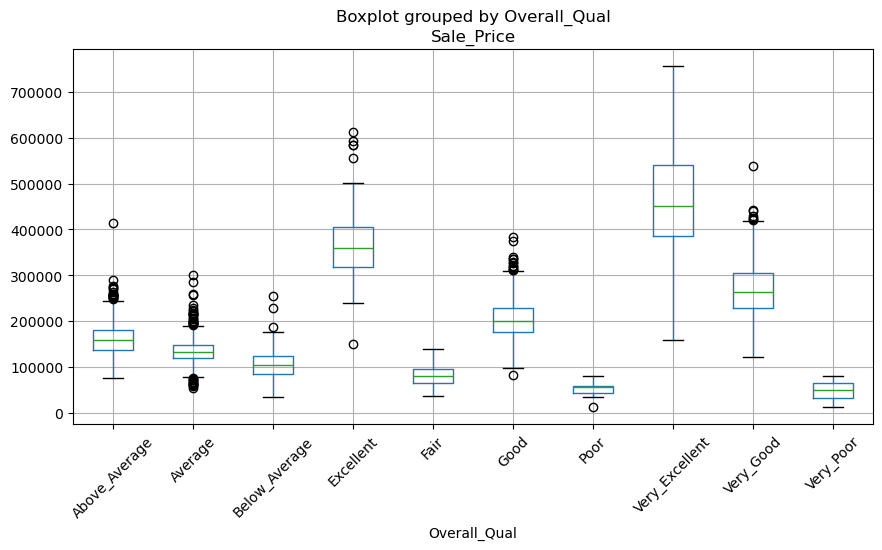

In [18]:
ames.boxplot(column='Sale_Price', by='Overall_Qual', figsize=(10, 5), rot=45);

In [19]:
from pandas.api.types import CategoricalDtype

categories = ['Very_Poor', 'Poor', 'Fair', 'Below_Average', 'Average', 'Above_Average', 'Good',
              'Very_Good', 'Excellent', 'Very_Excellent']

cat_type = CategoricalDtype(categories=categories, ordered=True)
ames['Overall_Qual'] = ames['Overall_Qual'].astype(cat_type)
ames['Overall_Qual']

0       Above_Average
1             Average
2       Above_Average
3                Good
4             Average
            ...      
2925    Above_Average
2926          Average
2927          Average
2928          Average
2929             Good
Name: Overall_Qual, Length: 2930, dtype: category
Categories (10, object): ['Very_Poor' < 'Poor' < 'Fair' < 'Below_Average' ... 'Good' < 'Very_Good' < 'Excellent' < 'Very_Excellent']

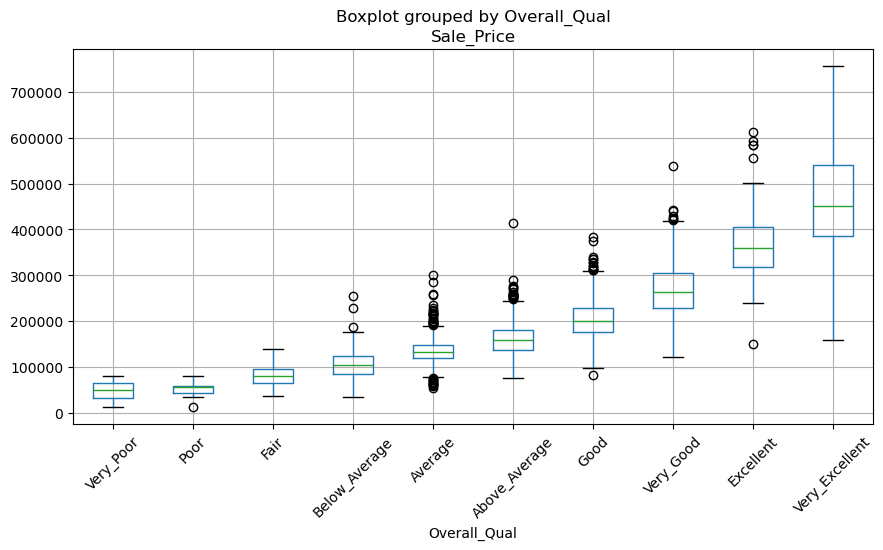

In [20]:
ames.boxplot(column='Sale_Price', by='Overall_Qual', figsize=(10, 5), rot=45);

### Modular code & Scikit-learn model

1. Copy `my_module.py` (that we created together) into the notebooks folder.
2. Import your module and use `get_features_and_target` to load the numeric features of the Ames data, along with the "Sale_Price" as a target column.

With your features and target prepared:
1. Split the data into training and test sets. Use 75% of the data for training and 25% for testing.
2. Fit a default `sklearn.neighbors.KNeighborsRegressor` model on the training data and score on the test data. Note that scoring on regression models provides the $R^2$.
3. Fit a default `sklearn.linear_model.LinearRegression` model on the training data and score on the test data.
4. Fit a default `sklearn.ensemble.RandomForestRegressor` model on the training data and score on the test data.

In [23]:
from my_module import get_features_and_target

num_features, target = get_features_and_target('../data/ames.csv', 'Sale_Price')

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    num_features,
    target,
    random_state=123,
    test_size=0.25
)

In [25]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.6949157417705423

In [26]:
from sklearn.linear_model import LinearRegression

lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
lm_model.score(X_test, y_test)

0.8104251490010683

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.8706118120264029

### Feature engineering

1. Fill in the blanks to standardize the numeric features and then apply a linear regression model. Does standardizing the numeric features improve the linear regression's $R^2$?

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lm_model_scaled = make_pipeline(StandardScaler(), LinearRegression())
lm_model_scaled.fit(X_train, y_train)
lm_model_scaled.score(X_test, y_test)

0.8105673704603199

2. Using the code chunks below, which computes the following:

- identifies numeric, categorical, and ordinal columns in our full feature set,
- replaces unique values in our ordinal columns (i.e. "No_basement", "No_garage"), and
- creates our encoders for the numeric, categorical, and ordinal columns.

<div class="admonition note alert alert-info">
    <p class="first admonition-title" style="font-weight: bold;"><b>Note</b></p>
<p class="last">Run the following two code cells without changing anything.</p>
</div>

In [29]:
######## RUN THIS CODE CELL AS-IS ########

# get columns of interest
numerical_columns = num_features.columns
ordinal_columns = cat_features.filter(regex='Qual').columns
categorical_columns = cat_features.drop(columns=ordinal_columns).columns

# replace unique values in our ordinal columns (i.e. "No_basement", "No_garage") with 'NA'
for col in ordinal_columns:
    features[col] = features[col].replace(to_replace='No_.*', value='NA', regex=True)
    
# split full feature set (numeric, categorical, & ordinal features) into train & test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=123)

In [30]:
######## RUN THIS CODE CELL AS-IS ########

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# create our numeric, categorical, and ordinal preprocessor encoders
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

ordinal_categories = [
    "NA", "Very_Poor", "Poor", "Fair", "Below_Average", "Average", "Typical",
    "Above_Average", "Good", "Very_Good", "Excellent", "Very_Excellent"
]
list_of_ord_cats = [ordinal_categories for col in ordinal_columns]
ordinal_preprocessor = OrdinalEncoder(categories=list_of_ord_cats)

2. Continued...

Now fill in the blanks to create our `ColumnTransformer` that:

- standardizes numerical columns (preprocessor: `numerical_preprocessor`; columns of interest: `numerical_columns`) 
- one-hot encodes categorical columns (preprocessor: `categorical_preprocessor`; columns of interest: `categorical_columns`) 
- ordinal encodes ordinal columns (preprocessor: `ordinal_preprocessor`; columns of interest: `ordinal_columns`) 

In [31]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('standard_scaler', numerical_preprocessor, numerical_columns),
    ('one_hot_encoder', categorical_preprocessor, categorical_columns),
    ('ordinal_encoder', ordinal_preprocessor, ordinal_columns),
])

3. Now create a pipeline that includes the preprocessing step and applies a linear regression model. Does this improve the linear regression's $R^2$?

In [33]:
lm_full = make_pipeline(preprocessor, LinearRegression())
_ = lm_full.fit(X_train, y_train)
lm_full.score(X_test, y_test)

0.8849712205153636

4. If time allows, create a pipeline that applies these preprocessing steps with a default random forest model and see if performance improves.

In [34]:
rf_full = make_pipeline(preprocessor, RandomForestRegressor())
_ = rf_full.fit(X_train, y_train)
rf_full.score(X_test, y_test)

0.903675911248999

### GitHub Check-in

Add, commit (with a good message!), and push your code to this point.

## Part 2

### Model evaluation & selection

1. Using same preprocessing pipeline you created in Part 1, fit a default random forest model using a 5-fold cross validation procedure using the root mean squared error metric (`'neg_root_mean_squared_error'`).

In [36]:
from sklearn.model_selection import cross_validate

cross_validate(rf_full, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

{'fit_time': array([28.04827738, 28.19180441, 28.31127453, 28.89940453, 28.57530046]),
 'score_time': array([0.03809404, 0.02932096, 0.04361844, 0.0336535 , 0.04072046]),
 'test_score': array([-27024.07252651, -27065.53384692, -22809.9186735 , -28656.3621734 ,
        -26004.33035735])}

2. Run the following two code chunks as is without making any changes. This will create a random forest model pipeline and create specified hyperparameter distributions to draw from.

In [37]:
######## RUN THIS CODE CELL AS-IS ########

from scipy.stats import loguniform


class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

In [38]:
######## RUN THIS CODE CELL AS-IS ########

from sklearn.pipeline import Pipeline

# create preprocessor & modeling pipeline
rf = RandomForestRegressor(random_state=123)
pipeline = Pipeline([('prep', preprocessor), ('rf', rf)])

# specify hyperparameter distributions to randomly sample from
param_distributions = {
    'rf__n_estimators': loguniform_int(50, 1000),
    'rf__max_features': loguniform(.1, .8),
    'rf__max_depth': loguniform_int(2, 30),
    'rf__min_samples_leaf': loguniform_int(1, 100),
    'rf__max_samples': loguniform(.5, 1),
}

2. Continued...

Fill in the blanks to perform a random hyperparameter search based on the following:

- use the parameter distributions specified above,
- perform 25 random searches,
- use a 5-fold cross-validation procedure, and
- use root mean squared error (RMSE) as our scoring metric.

What are the hyperparameters that provide the lowest RMSE? What is the lowest cross validated RMSE?

In [43]:
%%time
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions,
    n_iter=25,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1,
)

results = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
CPU times: total: 8.55 s
Wall time: 3min 2s


In [44]:
results.best_score_

-26592.51609007572

In [45]:
results.best_params_

{'rf__max_depth': 20,
 'rf__max_features': 0.29117609397181465,
 'rf__max_samples': 0.9503367926574456,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 51}

### Modular code & unit tests

1. Move the `loguniform_int` class we defined above into a new module, `loguniform_int.py`. We haven't put classes into modules before, but it's no different than a function; just paste it along with any imports it needs.

Your new module should contain something like:

```python
from scipy.stats import loguniform

class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)
```

2. Import your module and make sure you can use it in code by (re)running the below:

In [40]:
from loguniform_int import loguniform_int

param_distributions = {
    'rf__n_estimators': loguniform_int(50, 1000),
    'rf__max_features': loguniform(.1, .8),
    'rf__max_depth': loguniform_int(2, 30),
    'rf__min_samples_leaf': loguniform_int(1, 100),
    'rf__max_samples': loguniform(.5, 1),
}

random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, # lower this to 10 so it's faster
    cv=5, 
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1,
)

results2 = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


3. Create a `tests.py` file in which you add the tests we already create for `get_features_and_target` (you can just copy them), along with a new test that asserts that `loguniform` objects have a `._distribution.args` attribute that holds the original numbers passed into them -- confirming that we did indeed create the kind of distribution we expected. Run the tests when finished.

```python
>>> lu = loguniform_int(2, 30)
>>> lu._distribution.args
(2, 30)
```

4. Parametrize this test. Create one `loguniform_int` with `(2, 30)` as the arguments and another with `(1, 100)` as the arguments. Confirm that in both cases, the resulting `._distribution.args` attribute holds a tuple with the same numbers that were supplied initially. Rerun your tests.

### ML lifecycle management

1. Create and set an MLflow experiment titled "UC Advanced Python Case Study"
2. Re-perform the random hyperparameter search executed above while logging the hyperparameter search experiment with MLflow's autologging. Title this run "rf_hyperparameter_tuning".

In [47]:
import mlflow

mlflow.set_experiment('UC Advanced Python Case Study')

<Experiment: artifact_location='file:///c:/Users/sbhobbes/Documents/git/advanced-python-datasci/uc_course/notebooks/mlruns/198523336381487940', creation_time=1705607919092, experiment_id='198523336381487940', last_update_time=1705607919092, lifecycle_stage='active', name='UC Advanced Python Case Study', tags={}>

In [49]:
mlflow.sklearn.autolog()

with mlflow.start_run(run_name='rf_hyperparameter_tuning') as run:
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_distributions,
        n_iter=25,
        cv=5,
        scoring='neg_root_mean_squared_error',
        verbose=1,
        n_jobs=1
    )
    
    results = random_search.fit(X_train, y_train)

2024/01/18 14:59:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\sbhobbes\Anaconda3\envs\uc-python\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/01/18 14:59:55 WARNING mlflow.data.pandas_dataset: Failed to infer schema for Pandas dataset. Exception: Unable to map 'object' type to MLflow DataType. object can be mapped iff all values have identical data type which is one of (string, (bytes or byterray),  int, float).


Fitting 5 folds for each of 25 candidates, totalling 125 fits


2024/01/18 15:19:05 WARNING mlflow.sklearn: Failed to infer model signature: Unable to map 'object' type to MLflow DataType. object can be mapped iff all values have identical data type which is one of (string, (bytes or byterray),  int, float).
2024/01/18 15:19:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\sbhobbes\Anaconda3\envs\uc-python\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."
2024/01/18 15:19:12 INFO mlflow.sklearn.utils: Logging the 5 best runs, 20 runs will be omitted.


In [51]:
!mlflow ui

^C
